# Support Vector Machine

Use a linear model and try to find a linear decision boundary that best separates the data. The best hyperplane is the one that yields the largest separation/margin between both classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized.

$w x_{i} - b \ge 1 $ if $ y_{i} = 1$ <br>
$w x_{i} - b \le -1 $ if $ y_{i} = -1$ <br>

Hinge Loss: <br>
l = $max(0, 1 - y_{i}(w x_{i} - b))$ <br>

l = 0 if $y f(x) \ge 1$ otherwise, l = 1 - $y f(x)$ <br>

Add Regularization: <br>

$ J = \lambda ||w||^{2} + \frac{1}{n} \sum_{i=1}^{n} max(0, 1 - y_{i}(wx_{i} - b))$ <br>

if $y_{i} f(x) \ge 1$: <br>

$J_{i} = \lambda ||w||^{2}$

else <br>

$j_{i} = \lambda ||w||^{2} + 1 - y_{i}(w x_{i} - b)$

Gradients: <br>

if $y_{i} f(x) \ge 1$: <br>

$\frac{dJ_{i}}{dw_{k}} = 2\lambda w_{k}$ 

$\frac{dJ_{i}}{db} 0$

else:

$\frac{dJ_{i}}{dw_{k}} = 2\lambda w_{k} - y_{i} x_{ik}$ 

$\frac{dJ_{i}}{db} = y_{i}$

Update rule: <br>

if $y_{i} f(x) \ge 1$: <br>

$w = w - \alpha dw = w - \alpha {2 \lambda {w}} $

$b = b - \alpha db = b$  

else:

$w = w - \alpha dw = w - \alpha ({2 \lambda {w}} - y_{i}x_{i}) $

$b = b - \alpha db = b - \alpha y_{i}$  


Training:
* Initialize weights
* Make sure $y \in {-1, 1}$
* Update rules for n_iters

Predictions:
* Calculate $y = sign(w x - b)$

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
class SVM:
    def __init__(self, learning_rate = 0.001, lambda_param = 0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <=0, -1, 1)
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.bias -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

In [3]:
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [4]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 1.0


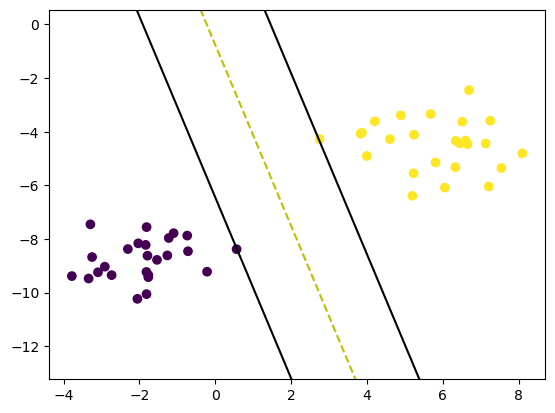

In [5]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.weights, clf.bias, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.weights, clf.bias, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.weights, clf.bias, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.weights, clf.bias, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.weights, clf.bias, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.weights, clf.bias, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()